# NBA STATISTICAL ANALYSIS

NBA generate thousands of data during a season. 

In this project we are going to work with different datasets that will give us useful information to make correct correlations between our data and to practice about all the concepts studied in class. 

## INTRO

Real Plus Minus (RPM) is the player's average impact in terms of net point differential per 100 offensive and defensive possessions. 

RPM is created by former Phoenix Suns consultant Steve Ilardi and Jeremias Engelmann, based on Engelmann's version (xRAPM) of Regularized Adjusted Plus-Minus.

Another important concept that we see is ELO. 
Elo ratings have a simple formula; the only inputs are the final score of each game, and where and when it was played. Teams always gain Elo points for winning and these ratings also variate during the years. 
It's a kind of "ranking"

Once the concepts are defined: 

- Is a player RPM correlated with their total minutes played?


- What's more important to determine RPM of a player? Defensive or offensive attributes?

    
- Can we predict the ELO of NBA teams? 

### Libraries

In [214]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring the data

In [179]:
player_df = pd.read_csv('nba_2019_players_with_salary_wiki_twitter.csv')
player_df.head(10)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0
5,5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,1.93,8.42,20.43,18.3,98.38,51,30.96,14704.0,5533.5,1501.5
6,6,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,...,1.25,7.08,15.53,17.4,95.79,54,17.64,2446.5,2701.5,716.5
7,7,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,...,0.14,7.41,18.80,15.1,105.08,65,12.11,17570.5,12278.0,2893.0
8,8,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,...,-2.30,2.05,8.28,13.5,99.12,47,17.64,4796.0,1541.0,695.0
9,9,12,Kevin Durant,SF,28,33.4,8.9,16.5,0.537,1.9,...,1.33,5.74,12.24,18.6,103.71,51,26.50,6288.5,1425.5,366.0


In [180]:
player_df.columns

Index(['Unnamed: 0', 'Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS',
       'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE',
       'W', 'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT',
       'TWITTER_RETWEET_COUNT'],
      dtype='object')

In [181]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 42 columns):
Unnamed: 0                239 non-null int64
Rk                        239 non-null int64
PLAYER                    239 non-null object
POSITION                  239 non-null object
AGE                       239 non-null int64
MP                        239 non-null float64
FG                        239 non-null float64
FGA                       239 non-null float64
FG%                       239 non-null float64
3P                        239 non-null float64
3PA                       239 non-null float64
3P%                       232 non-null float64
2P                        239 non-null float64
2PA                       239 non-null float64
2P%                       239 non-null float64
eFG%                      239 non-null float64
FT                        239 non-null float64
FTA                       239 non-null float64
FT%                       237 non-null float64
ORB       

In [182]:
player_df.shape

(239, 42)

We have an unnamed column and rk column with useless information. Let's drop it.

In [183]:
filter_col = [col for col in player_df if col.startswith('Unnamed')]
filter_col = [col for col in player_df if col.startswith('Rk')]
player_df = player_df.drop(columns=filter_col)

In [184]:
missing_values = (player_df.isnull().sum() * 100 / len(player_df))
missing_values.sort_values(ascending = False)

3P%                       2.92887
TWITTER_RETWEET_COUNT     1.25523
TWITTER_FAVORITE_COUNT    1.25523
FT%                       0.83682
POSITION                  0.00000
AGE                       0.00000
ORB                       0.00000
FTA                       0.00000
FT                        0.00000
eFG%                      0.00000
2P%                       0.00000
2PA                       0.00000
2P                        0.00000
PLAYER                    0.00000
DRB                       0.00000
3P                        0.00000
FG%                       0.00000
FGA                       0.00000
FG                        0.00000
MP                        0.00000
3PA                       0.00000
TRB                       0.00000
AST                       0.00000
DRPM                      0.00000
PAGEVIEWS                 0.00000
SALARY_MILLIONS           0.00000
W                         0.00000
PACE                      0.00000
PIE                       0.00000
WINS_RPM      

Let's rename our columns deleting all the % symbols

In [185]:
player_df.rename(columns={'3P%': '3P',
                          'FT%': 'FT',
                          'eFG%': 'eFG',
                          '2P%': '2P',
                          'FG%': 'FG', 
                         }, inplace=True)

In [186]:
player_df.head()

,Unnamed: 0,PLAYER,POSITION,AGE,MP,FG,FGA,FG,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


We have a complete dataset without practically any 'NaN' cell and with important parameters like:

- Player: Name

- MP: Minutes Played

- FG%: Field Goal Percentage

- AST: Assists

- SALARY_MILLIONS: Sallary millions ($)

- RPM

- MPG: Minutes per game

- GP: Games Played

- POINTS: Points per player 

In [187]:
player_df.corr()

,Unnamed: 0,AGE,MP,FG,FGA,FG,3P,3PA,3P,2P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Unnamed: 0,1.000000,-0.014174,-0.917031,-0.955201,-0.950543,-0.268824,-0.636238,-0.630349,-0.327503,-0.868831,...,0.081296,-0.582355,-0.681676,-0.717908,-0.195656,-0.449722,-0.595502,-0.341672,-0.284844,-0.294997
AGE,-0.014174,1.000000,0.052484,-0.006908,-0.018904,0.129123,0.053500,0.021440,0.027471,-0.033056,...,0.158563,0.207790,0.122101,0.113873,-0.034182,0.092175,0.354779,0.166699,0.048082,0.008563
MP,-0.917031,0.052484,1.000000,0.868258,0.871265,0.234976,0.596199,0.599654,0.297564,0.783183,...,0.019536,0.573235,0.694806,0.565987,0.157995,0.486120,0.577275,0.304930,0.214218,0.215855
FG,-0.955201,-0.006908,0.868258,1.000000,0.978105,0.300325,0.590194,0.584178,0.275942,0.941072,...,-0.060317,0.604333,0.721438,0.765449,0.175686,0.427651,0.630978,0.434746,0.347159,0.352017
FGA,-0.950543,-0.018904,0.871265,0.978105,1.000000,0.128217,0.672944,0.681072,0.353632,0.880942,...,-0.139709,0.543622,0.676531,0.688969,0.178010,0.389270,0.615622,0.410507,0.331997,0.336884
FG,-0.268824,0.129123,0.234976,0.300325,0.128217,1.000000,-0.189882,-0.249493,-0.332643,0.435590,...,0.294782,0.359526,0.302050,0.532211,0.055676,0.286450,0.206219,0.122981,0.078011,0.081683
3P,-0.636238,0.053500,0.596199,0.590194,0.672944,-0.189882,1.000000,0.987919,0.611364,0.283150,...,-0.322161,0.400825,0.489492,0.291259,0.215440,0.347177,0.358943,0.360652,0.325250,0.235959
3PA,-0.630349,0.021440,0.599654,0.584178,0.681072,-0.249493,0.987919,1.000000,0.591970,0.280841,...,-0.330731,0.377633,0.482586,0.265635,0.232275,0.328095,0.351533,0.344331,0.304563,0.223190
3P,-0.327503,0.027471,0.297564,0.275942,0.353632,-0.332643,0.611364,0.591970,1.000000,0.072061,...,-0.278990,0.141162,0.174999,0.089535,0.061785,0.223490,0.161030,0.109670,0.111462,0.069343
2P,-0.868831,-0.033056,0.783183,0.941072,0.880942,0.435590,0.283150,0.280841,0.072061,1.000000,...,0.061305,0.549015,0.651291,0.786668,0.118710,0.361855,0.598556,0.366933,0.275777,0.318836


### Let's answer some of our questions. 
### Exists a correlation between MPG (minutes played per game) and RPM?

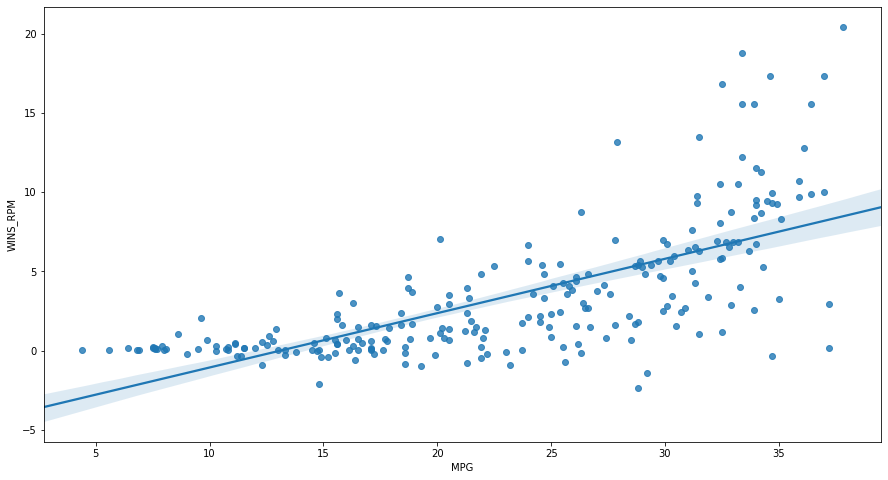

In [188]:
plt.figure(figsize=(15,8))
sns.regplot(x="MPG", y="WINS_RPM", data=player_df)

In the regression plot showed above, seems there is a correlation between RPM and Minutes played. We can see how if a player play around 15-25 MPG their correlation is better. 

However if a player is on the court more than 30 minutes or less than 10 minutes we lost this optimum correlation.

Let's check this relationship, their parameters and strength:

In [189]:
minutes = smf.ols('WINS_RPM ~ MP', data=player_df).fit()
print(minutes.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           8.78e-36
Time:                        03:56:26   Log-Likelihood:                -603.08
No. Observations:                 239   AIC:                             1210.
Df Residuals:                     237   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4785      0.568     -7.885      0.0

R-squared -> 0.481
Minutes played may not be the best predictor of player's RPM, we observe a weak positive correlation.

But...

What will happens if we add the player position as a RPM predictor combined with Minutes Played?

In [190]:
minutes = smf.ols('WINS_RPM ~ MP + POSITION', data=player_df).fit()
print(minutes.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     52.87
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.64e-36
Time:                        03:56:26   Log-Likelihood:                -591.26
No. Observations:                 239   AIC:                             1195.
Df Residuals:                     233   BIC:                             1215.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.6846      0.674     -5.

Well, we observe a better correlation. Position has a little influence in our initial correlation.

### What's more important to determine RPM of a player? Defensive or offensive attributes?

First of all, we are going to create defensive and offensive subsets to work with them separately:

We are going to create a DataFrame with the most important deffensive parameters:
- DRB: Deffensive Rebounds

- STL: Steals

- BLK: Blocks

- RPM

In [191]:
deffensive_atr_df = player_df[["PLAYER","DRB","STL","BLK","WINS_RPM"]].copy()
deffensive_atr_df.head(15)

,PLAYER,DRB,STL,BLK,WINS_RPM
0,Russell Westbrook,9.0,1.6,0.4,17.34
1,James Harden,7.0,1.5,0.5,15.54
2,Anthony Davis,9.5,1.3,2.2,12.81
3,DeMarcus Cousins,8.9,1.4,1.3,11.26
4,Damian Lillard,4.3,0.9,0.3,10.72
5,LeBron James,7.3,1.2,0.6,20.43
6,Kawhi Leonard,4.7,1.8,0.7,15.53
7,Stephen Curry,3.7,1.8,0.2,18.80
8,Kyrie Irving,2.5,1.2,0.3,8.28
9,Kevin Durant,7.6,1.1,1.6,12.24


In [192]:
deffensive_atr_df.corr()

,DRB,STL,BLK,WINS_RPM
DRB,1.000000,0.407956,0.660216,0.657377
STL,0.407956,1.000000,0.197189,0.659305
BLK,0.660216,0.197189,1.000000,0.419684
WINS_RPM,0.657377,0.659305,0.419684,1.000000


We have a stronger correlation between defensive rebounds and steals, and a player's RPM. Now let's visualize this relationship.

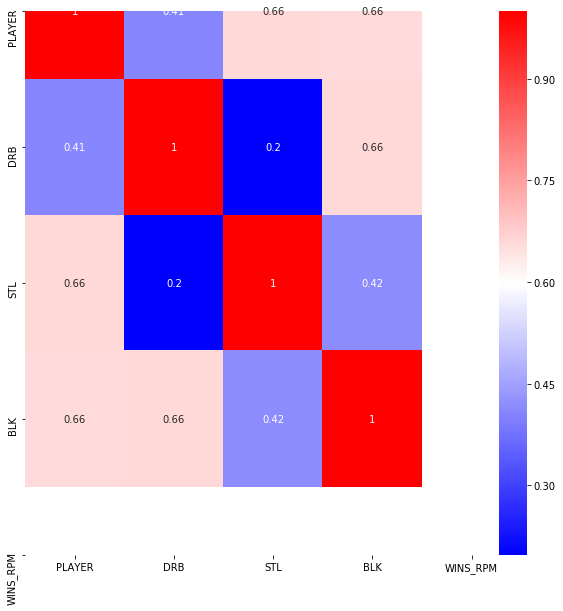

In [193]:
plt.subplots(figsize=(10,10))
sns.heatmap(deffensive_atr_df.corr(), 
            xticklabels=deffensive_atr_df.columns.values, 
            yticklabels=deffensive_atr_df.columns.values, cmap="bwr",annot=True)

Let's see the covariance too

In [194]:
deffensive_atr_df.cov()

,DRB,STL,BLK,WINS_RPM
DRB,3.533134,0.319000,0.517600,5.195204
STL,0.319000,0.173059,0.034214,1.153166
BLK,0.517600,0.034214,0.173963,0.735968
WINS_RPM,5.195204,1.153166,0.735968,17.677302


Ok, let's do a regression model to see the strength of deffensive parameters related with RPM

In [195]:
defense = smf.ols('WINS_RPM ~ DRB + STL + BLK', data=deffensive_atr_df).fit()
print(defense.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.25e-48
Time:                        03:56:28   Log-Likelihood:                -567.38
No. Observations:                 239   AIC:                             1143.
Df Residuals:                     235   BIC:                             1157.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5604      0.399     -8.924      0.0

We are showing a Adjusted R-Squared value of 0.61  
This would generally be considered a moderate positive correlation. Our correlation is better than the previous question. We are improving the correlation.

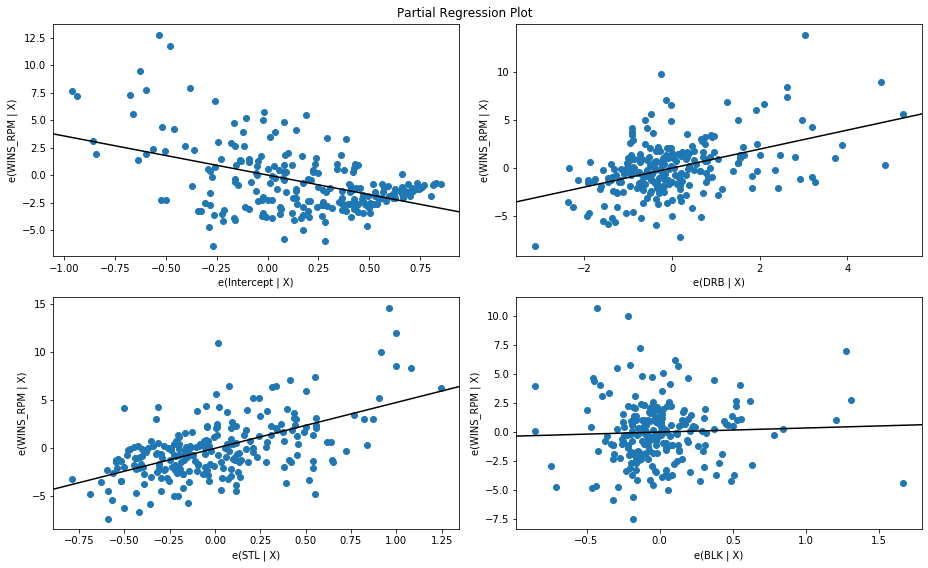

In [196]:
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_partregress_grid(defense, fig=fig)

In the graphs above, we can see that our correlation depends basically of STL and DRB, because BLK doesn't mean an important parameter to our correlation.

Ok, we saw the correlation between RPM and defensive parameters. 

Let's talk about offensive parameters. 
We are going to create a DataFrame with the most important offensive data:

- eFG: effective Field Goal

- FT: Free Throw per Game

- FT: Free Throw Percentage

- ORB: Offensive Rebounds

- AST: Assists

- POINTS: Points

- RPM

In [197]:
offensive_atr_df = player_df[["PLAYER","eFG","FT","ORB","AST","POINTS","WINS_RPM"]].copy()
offensive_atr_df.head()

,PLAYER,eFG,FT,FT,ORB,AST,POINTS,WINS_RPM
0,Russell Westbrook,0.476,8.8,0.845,1.7,10.4,31.6,17.34
1,James Harden,0.525,9.2,0.847,1.2,11.2,29.1,15.54
2,Anthony Davis,0.518,6.9,0.802,2.3,2.1,28.0,12.81
3,DeMarcus Cousins,0.498,7.2,0.772,2.1,4.6,27.0,11.26
4,Damian Lillard,0.516,6.5,0.895,0.6,5.9,27.0,10.72


Let's see the correlation and covariance of offensive parameters.

In [198]:
offensive_atr_df.corr()

,eFG,FT,FT,ORB,AST,POINTS,WINS_RPM
eFG,1.000000,0.172034,0.066847,0.354743,0.047433,0.303443,0.377955
FT,0.172034,1.000000,0.402037,0.273392,0.666784,0.904478,0.723831
FT,0.066847,0.402037,1.000000,-0.309833,0.336495,0.416542,0.229464
ORB,0.354743,0.273392,-0.309833,1.000000,-0.029561,0.255789,0.346462
AST,0.047433,0.666784,0.336495,-0.029561,1.000000,0.672545,0.617456
POINTS,0.303443,0.904478,0.416542,0.255789,0.672545,1.000000,0.748621
WINS_RPM,0.377955,0.723831,0.229464,0.346462,0.617456,0.748621,1.000000


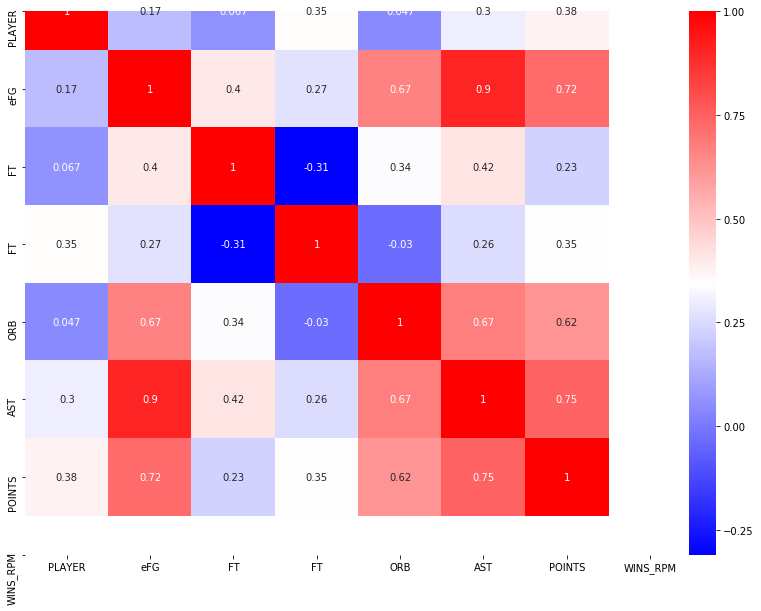

In [199]:
plt.subplots(figsize=(14,10))
sns.heatmap(offensive_atr_df.corr(), 
            xticklabels=offensive_atr_df.columns.values, 
            yticklabels=offensive_atr_df.columns.values, cmap="bwr",annot=True)

In [200]:
offensive_atr_df.cov()

,eFG,FT,FT,ORB,AST,POINTS,WINS_RPM
eFG,0.003959,0.017873,0.000466,0.017873,0.006065,0.124676,0.099983
FT,0.017873,2.726464,0.073486,0.361487,2.237439,9.752735,5.025101
FT,0.000466,0.073486,0.012275,-0.027586,0.075837,0.300822,0.107044
ORB,0.017873,0.361487,-0.027586,0.641229,-0.048105,1.337572,1.166461
AST,0.006065,2.237439,0.075837,-0.048105,4.129830,8.925165,5.275698
POINTS,0.124676,9.752735,0.300822,1.337572,8.925165,42.643943,20.554119
WINS_RPM,0.099983,5.025101,0.107044,1.166461,5.275698,20.554119,17.677302


In [201]:
offense = smf.ols('WINS_RPM ~ eFG + ORB + FT + AST + POINTS', data=offensive_atr_df).fit()
print(offense.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     74.29
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           4.46e-51
Time:                        03:56:30   Log-Likelihood:                -548.79
No. Observations:                 237   AIC:                             1112.
Df Residuals:                     230   BIC:                             1136.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0254      1.815     -3.871      0.0

We have a moderate positive correlation showing a R-squared value of 0.65. I think that if we delete all independent variables with a pvalue > 0, we have a better correlation. But this indicator is much better than the first that we predicted before. And is a little bit stronger than our deffensive model.

Let's see some additional graphs to see the importance of our parameters

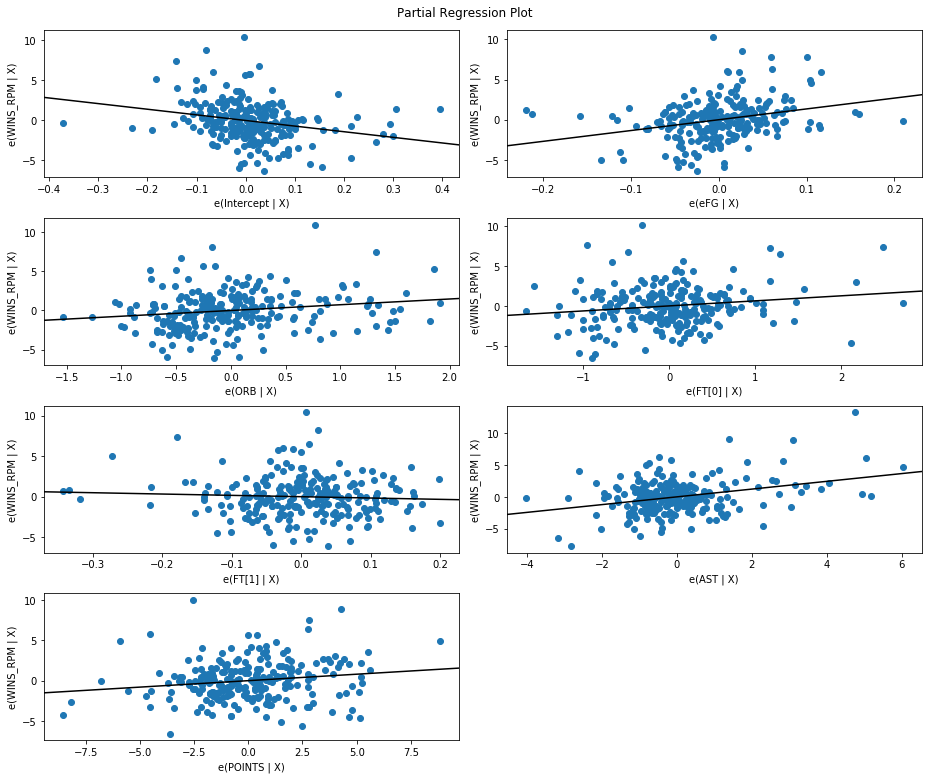

In [202]:
fig = plt.figure(figsize=(13,11))
fig = sm.graphics.plot_partregress_grid(offense, fig=fig)

We can't see clearly which variable is more valuable than the others. Let's see it:

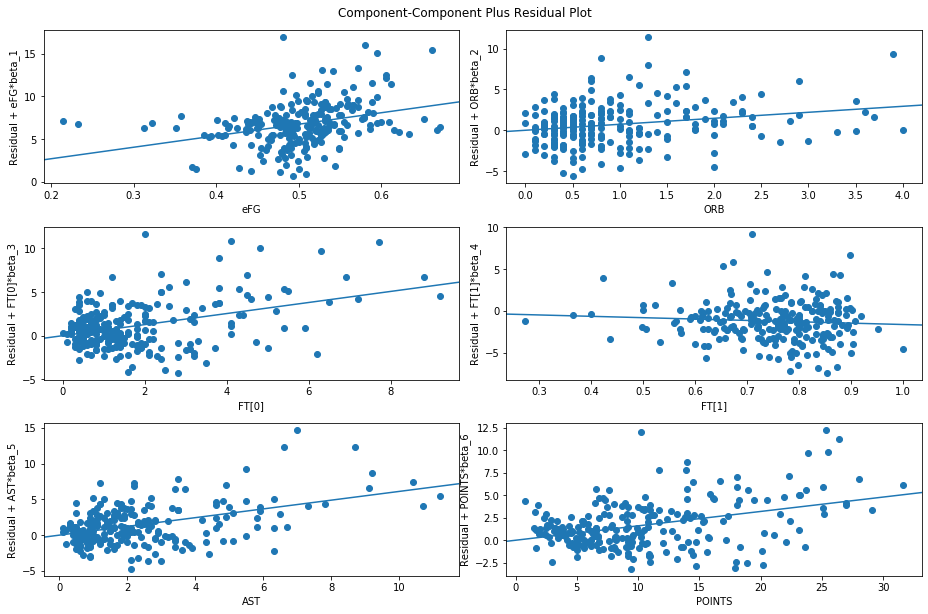

In [203]:
fig = plt.figure(figsize=(13, 11))
fig = sm.graphics.plot_ccpr_grid(offense, fig=fig)

### To complete the answer of the question, we can conclude that the offensive parameters has a little bit more importance than the defensive parameters. 

DEFFENSIVE R-SQUARED COEFFICIENT : 0.611

OFFENSIVE R-SQUARED COEFFICIENT : 0.651

Finally, we can do a complete predictive model with most valuables parameters of both models. 

Taking the parameters with pvalue = 0

In [204]:
mvp_atr = player_df[["PLAYER","POINTS","AST","STL","DRB","ORB","eFG","WINS_RPM"]].copy()
mvp_atr.head()

,PLAYER,POINTS,AST,STL,DRB,ORB,eFG,WINS_RPM
0,Russell Westbrook,31.6,10.4,1.6,9.0,1.7,0.476,17.34
1,James Harden,29.1,11.2,1.5,7.0,1.2,0.525,15.54
2,Anthony Davis,28.0,2.1,1.3,9.5,2.3,0.518,12.81
3,DeMarcus Cousins,27.0,4.6,1.4,8.9,2.1,0.498,11.26
4,Damian Lillard,27.0,5.9,0.9,4.3,0.6,0.516,10.72


In [205]:
best_attributes = smf.ols('WINS_RPM ~ STL + DRB + eFG + AST + POINTS', data=mvp_atr).fit()
print(best_attributes.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           5.40e-60
Time:                        03:56:35   Log-Likelihood:                -535.36
No. Observations:                 239   AIC:                             1083.
Df Residuals:                     233   BIC:                             1104.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1410      1.244     -6.545      0.0

We are showing the most strong positive correlation since the first model. 0.7. 

It's logic picking out the best parameters, that we obtain the best correlation in fact.

### Can we predict the ELO of each team?

To analyze this point, we are going to read three different datasets that talks about: 

- Stadium attendance teams 

- Valuations in millions

- ELO of the teams (we talked about this concept in the intro)

In [206]:
attendance_df = pd.read_csv("nba_2019_attendance.csv")
attendance_df.head()

,TEAM,GMS,TOTAL,AVG,PCT
0,Chicago Bulls,41,888882,21680,103.6
1,Dallas Mavericks,41,811366,19789,103.1
2,Sacramento Kings,41,721928,17608,100.6
3,Miami Heat,41,805400,19643,100.2
4,Toronto Raptors,41,813050,19830,100.2


In [207]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
TEAM     30 non-null object
GMS      30 non-null int64
TOTAL    30 non-null int64
AVG      30 non-null int64
PCT      30 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


In [208]:
valuations_df = pd.read_csv("nba_2019_team_valuations.csv")
valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [209]:
valuations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
TEAM              30 non-null object
VALUE_MILLIONS    30 non-null float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [210]:
elo_df = pd.read_csv("nba_2019_elo.csv")
elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [211]:
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
ELO     30 non-null int64
TEAM    30 non-null object
CONF    30 non-null object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


After reading these datasets, we are going to merge them to have all the info in one dataset to work with the data.

We do the merge on the common parameter: TEAM

In [212]:
attendance_valuations_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")
attendance_valuations_elo_df = attendance_valuations_df.merge(elo_df, how="inner", on="TEAM")
merged_atvaelo_df = attendance_valuations_elo_df
merged_atvaelo_df.head()

,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,888882,21680,103.6,2500.0,1519,East
1,Dallas Mavericks,41,811366,19789,103.1,1450.0,1420,West
2,Sacramento Kings,41,721928,17608,100.6,1075.0,1393,West
3,Miami Heat,41,805400,19643,100.2,1350.0,1569,East
4,Toronto Raptors,41,813050,19830,100.2,1125.0,1600,East


In [218]:
tot = go.Bar(x=merged_atvaelo_df['TEAM'],
             y=merged_atvaelo_df['VALUE_MILLIONS'],
             name='Team Value',
             marker=dict(color='orange'))

data=[tot]

layout=go.Layout(
    title='Value of NBA Teams',
    xaxis=dict(title='Teams',
               titlefont=dict(size=16, color='black'),
               tickfont=dict(size=14, color='#0080ff')),
    
    yaxis=dict(title='Millions',
               titlefont=dict(size=16, color='black'),
               tickfont=dict(size=14, color='#0080ff'),
               showgrid=True, 
               gridwidth=0.2, 
               gridcolor='white'),
    
    legend=dict(x=1,
                y=1.0,
                bgcolor='white',
                bordercolor='white'),
    
    plot_bgcolor='#9c9c9c',
    barmode='group',
    bargap=0.2,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [219]:
train_x = attendance_valuation_elo_df.drop(["ELO","TEAM","CONF"],axis=1)
train_y = attendance_valuation_elo_df["ELO"]

x = sm.add_constant(train_x, has_constant='add')
est = sm.OLS(train_y, x)
est = est.fit()
print(est.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ELO   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.8356
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.516
Time:                        03:59:18   Log-Likelihood:                -180.32
No. Observations:                  30   AIC:                             370.6
Df Residuals:                      25   BIC:                             377.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7130      0.147      4.

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



At this point, we already can predict the different ELO of the NBA teams.

In [220]:
pred_y= est.predict(x)
pred_y

0     1568.659368
1     1537.188367
2     1526.014131
3     1509.713040
4     1542.160247
5     1530.780705
6     1581.949342
7     1527.059628
8     1539.182473
9     1503.373866
10    1493.348262
11    1493.123492
12    1517.557197
13    1534.353641
14    1555.275467
15    1530.046834
16    1497.332325
17    1485.075574
18    1470.082206
19    1511.244671
20    1463.976585
21    1485.906132
22    1490.679110
23    1459.708052
24    1438.053363
25    1492.093393
26    1481.716213
27    1453.257957
28    1431.381769
29    1494.706587
dtype: float64

In [234]:
ELO_comparison = merged_atvaelo_df.ELO - pred_y
ELO_comparison.index = merged_atvaelo_df.TEAM
ELO_comparison.sort_values(ascending=False)

TEAM
Golden State Warriors     242.940372
San Antonio Spurs         126.646359
Houston Rockets           116.924426
Washington Wizards        105.283787
Los Angeles Clippers      105.219295
Denver Nuggets             98.742043
Boston Celtics             93.651738
Utah Jazz                  61.724533
Miami Heat                 59.286960
Toronto Raptors            57.839753
Portland Trail Blazers     45.442803
Minnesota Timberwolves     31.618231
Atlanta Hawks              19.291948
Memphis Grizzlies          18.023415
Indiana Pacers             14.755329
Milwaukee Bucks             9.906607
Oklahoma City Thunder       3.817527
New Orleans Pelicans      -15.332325
Charlotte Hornets         -22.906132
Cleveland Cavaliers       -36.949342
Chicago Bulls             -49.659368
Detroit Pistons           -53.706587
Brooklyn Nets             -66.053363
Dallas Mavericks         -117.188367
Los Angeles Lakers       -126.123492
New York Knicks          -129.373866
Phoenix Suns             -130.082

Now we can see the NBA teams, that, apparently, will have a best and worse progression. 

We don't have more time to develop this last part of the project to make more investigations.

Anyway offensive statistics are generally a better predictor of a players RPM, than a player's deffensive statistics. 

However, a combined deffensive and offensive regression model may serve as a better means of predicting a player's RPM.

Thanks :)